In [28]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import all the ml model libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

# let's read in the data
train = pd.read_csv("train_walmart.csv")
test = pd.read_csv("test_walmart.csv")

<b size="14px">Exploratory Data Analysis</b> <br>
Let's begin by exploring the data that I have here. 

In [3]:
train.describe(include="all")

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
count,647054.000000,647054.000000,647054,6.429250e+05,647054.000000,645693,642925.000000
unique,NaN,NaN,7,NaN,NaN,68,NaN
top,NaN,NaN,Sunday,NaN,NaN,GROCERY DRY GOODS,NaN
freq,NaN,NaN,133975,NaN,NaN,70402,NaN
mean,58.584511,96167.640078,NaN,3.060698e+10,1.108878,NaN,3726.884567
std,157.635533,55545.485154,NaN,9.120134e+10,0.700776,NaN,2780.966158
min,3.000000,5.000000,NaN,8.340000e+02,-12.000000,NaN,0.000000
25%,27.000000,49268.000000,NaN,3.400001e+09,1.000000,NaN,1404.000000
50%,39.000000,97074.000000,NaN,7.050103e+09,1.000000,NaN,3352.000000
75%,40.000000,144316.000000,NaN,3.006531e+10,1.000000,NaN,5501.000000


We have 647,054 rows of data. The various features we have are:

<b>TripType</b> - This is what we are trying to classify. There are roughly 40 types of trips.<br>
<b>VisitNumber</b> - The id corresponding to a single trip by a single customer <br>
<b>Weekday</b> - The day the trip was made <br>
<b>Upc</b> - The product code<br>
<b>ScanCount</b> - Number of items purchased<br>
<b>DeptDescription</b> - a high level description of the type of product<br>
<b>FinelineNumber</b> - a more refined category for the type of product<br>

Our categorical features are Weekday, DeptDescription, and FinelineNumber. <br>
Our ordinal features are Scancount. Alhough, I predict that the vast majority of the items will have a scancount of 1.

In [7]:
train.sample(10)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
493082,35,146338,Sunday,1.254601e+09,1,IMPULSE MERCHANDISE,135.0
647044,39,191346,Sunday,5.100020e+09,1,GROCERY DRY GOODS,3107.0
172224,43,51964,Saturday,8.397240e+10,1,HARDWARE,9802.0
104089,25,30248,Tuesday,4.529902e+09,1,BOYS WEAR,616.0
514082,6,152182,Monday,4.150000e+09,1,GROCERY DRY GOODS,2302.0
47622,44,13996,Sunday,1.113200e+09,1,PETS AND SUPPLIES,806.0
9057,25,3130,Friday,6.015604e+10,1,LADIESWEAR,1745.0
248382,40,73536,Tuesday,7.418229e+09,1,PERSONAL CARE,3159.0
17987,39,5739,Friday,7.320290e+09,1,FROZEN FOODS,4065.0
163233,38,49651,Saturday,4.178900e+09,1,GROCERY DRY GOODS,3105.0


Here, we have a sample of some of the data that we will be working with. We will need to change Weekday and Department Description from strings to floats. But let's do that later it's easier to see the data I am working with.

In [2]:
print(pd.isnull(train).sum())

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      4129
ScanCount                   0
DepartmentDescription    1361
FinelineNumber           4129
dtype: int64


A couple thousand of our values are null. Given that we have over 647,000 rows of data, we still have around 99.4% of all the data, so it is safe to ignore these data entries. Therefore, I will drop them from our data.

In [29]:
#train.replace(["NaN", 'NaT'], np.nan, inplace = True)
train = train.dropna()
train.describe(include="all")

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
count,642925.000000,642925.000000,642925,6.429250e+05,642925.000000,642925,642925.000000
unique,NaN,NaN,7,NaN,NaN,68,NaN
top,NaN,NaN,Sunday,NaN,NaN,GROCERY DRY GOODS,NaN
freq,NaN,NaN,133425,NaN,NaN,70402,NaN
mean,58.337228,96199.870353,NaN,3.060698e+10,1.110203,NaN,3726.884567
std,156.559892,55552.836758,NaN,9.120134e+10,0.701240,NaN,2780.966158
min,3.000000,5.000000,NaN,8.340000e+02,-12.000000,NaN,0.000000
25%,27.000000,49300.000000,NaN,3.400001e+09,1.000000,NaN,1404.000000
50%,39.000000,97116.000000,NaN,7.050103e+09,1.000000,NaN,3352.000000
75%,40.000000,144353.000000,NaN,3.006531e+10,1.000000,NaN,5501.000000


In [4]:
print(pd.isnull(train).sum())

TripType                 0
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64


Now that all of the NaN values are gone, let's start exploring the data! One of the first things I notice is that I can check when customers do the most shopping.

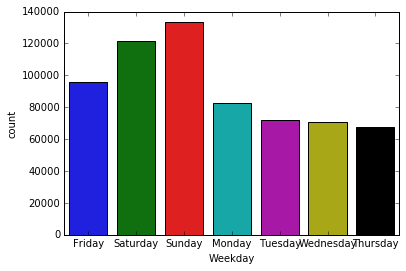

In [37]:
sns.countplot(x='Weekday', data=train)

As expected, most of the shopping happens on Friday, Saturday, and Sunday, which is when people are off work. Perhaps some Triptypes occur more often on some days than others.

In [38]:
pd.crosstab(train.Weekday,train.TripType,margins=True).style.background_gradient(cmap='summer_r')

TripType,3,4,5,6,7,8,9,12,14,15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,999,All
Weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Friday,1408,150,1765,655,3233,3566,2761,296,8,1481,588,224,479,571,520,82,2796,4411,388,806,435,293,514,302,2207,1596,785,1942,3579,5673,4110,14535,22972,860,2907,1120,2896,2703,95617
Monday,830,111,1464,336,3292,3117,2022,207,14,636,357,119,353,724,438,17,2582,2916,419,411,294,237,589,212,1641,1302,585,1685,2787,5390,4314,12856,22357,560,2034,828,2232,2294,82562
Saturday,1167,164,1966,855,3571,3612,3157,663,13,1497,699,196,595,508,805,63,3266,5578,380,1001,558,526,947,325,2455,1683,1016,2080,4129,6756,4361,16682,36354,1212,4019,1213,4463,2899,121434
Sunday,901,151,1558,442,4009,3689,2945,551,0,1121,604,186,600,561,697,85,3167,5656,514,934,451,444,1071,303,2768,1883,758,2130,3803,9110,6249,19421,42969,1281,4169,1157,4215,2872,133425
Thursday,760,106,1462,378,2859,2894,2025,92,0,950,198,110,346,466,423,24,2071,3149,174,485,415,202,559,237,1327,994,492,1654,2722,3907,3093,10538,14655,658,2158,620,2142,2101,67446
Tuesday,860,96,1468,351,2967,2989,1801,182,0,637,264,192,353,612,366,34,2166,3006,296,484,263,220,671,157,1781,1128,645,1436,2417,4236,3856,10988,17933,419,1976,633,1865,2185,71933
Wednesday,896,118,1570,385,3237,2899,2027,113,0,804,261,160,383,583,332,20,1919,2777,332,479,242,178,495,225,1633,1316,458,1565,2504,3814,3542,10349,16731,500,2155,774,2548,2184,70508
All,6822,896,11253,3402,23168,22766,16738,2104,35,7126,2971,1187,3109,4025,3581,325,17967,27493,2503,4600,2658,2100,4846,1761,13812,9902,4739,12492,21941,38886,29525,95369,173971,5490,19418,6345,20361,17238,642925


The darker the green is, the more correlated the day and triptype are. We can see that there are definitely some trip types that occur more often on some days than others. Tuesday, Thursday, and Wednesday tend to be relatively void of any correlations, but Friday, Saturday, Sunday, and Monday have more. However, this might be just because more of the shopping occurs during these days, so there might appear to be more correlations during these days. 

This information tells us that given a day, we have a relative probability for each of each TripType. For example, if we are trying to guess the tripType of a trip that was on Tuesday, then the algorithm probably wouldn't guess that it was Triptype 14.

What about Department Description?

In [39]:
pd.crosstab(train.DepartmentDescription,train.TripType,margins=True).style.background_gradient(cmap='summer_r')

Here, we can see much clearer correlations between the Department Type and the Triptype. In fact, we can even try to guess what each of the Triptypes are now. For example, Trip Type 22, we see 'Media and Gaming' and 'Electronics' highlighted, which are two departments relatively similar to each other. For Trip Type 23, I see 'Media and Gaming' and 'Players and Electronics' highlighted, so I would guess that Trip Type 22 and 23 are quite similar to each other. 

For feature engineering, I might combine some similar department descriptions, such as 'Players and Electronics' and 'Electronics', 'Mens wear' and 'Menswear' (really? why are there two different department descriptions for those). 'Ladies socks' and 'Ladies wear', we see relatively similar correlation boxes for those, so it would make sense to combine them.

Now, I am also a little bit curious about VisitId, which is the Id of a single trip by a single customer. Consequently, we can see which items are frequently bought together, the average number of items bought in a single trip, and so on. All of the items bought in the same trip have the same triptype, as they should. So, if I can find some correlation between the items bought, or even the department descriptions of those items, then that could help me determine the trip type for all the items.

<b>Feature Engineering</b> <br>
Let's try to do some feature engineering now.

I personally don't think the UPC value will be of that much use right now, so for the sake of experimentation, let's just delete it now. It's a continuous feature, and I think that it is of too high-dimensionality for it to be of any use. Additionally, I could technically try binning it, but isn't that what the Fineline Number and DeptDescription for? Except that those bin these values in a more sophisticated way.

In [30]:
train.drop(['Upc'],axis=1,inplace=True)

Okay, now let's convert all my weekdays into numbers. I'll set Sunday = 1, Monday = 2, etc.

In [38]:
#train['Weekday'].replace(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],[1,2,3,4,5,6,7],inplace=True)
test['Weekday'].replace(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],[1,2,3,4,5,6,7],inplace=True)

Okay, now let's try to combine some Department Descriptions and create a new feature. What descriptions do we have?

In [58]:
train.DepartmentDescription.unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP',
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',
    

In [33]:
train['newDeptDescription'] = pd.Series(np.random.randn(len(train['Weekday'])), index=train.index)

Let's combine.
1-HR Photo <br>
Accessories + Jewelry and Sunglasses = Accessories <br>
Automotive <br>
Beauty + Health and Beauty Aids + Bath and Shower = Beauty<br>
Boys wear + girls wear + Bras and Shapewear + Ladies Socks + Ladieswear + Menswear and Mens wear + Hosiery + Plus and Maternity + Shoes + Sleepwear + Swimwear/Outerwear = Clothing <br>
Cameras and Supplies <br>
Candy, Tobacco, Cookies + Alcohol = Comfort Foods<br>
Celebration <br>
Concept Stores <br>
Fabrics and Crafts + Bedding = Fabrics<br>
Financial Services <br>
Furniture + Home Decor + Home Management + Lawn and Garden + Paint and Accessories + Household Chemicals/Supp + Household Paper Good + Large Household Goods + Horticulture and Access = Home Care<br>
Hardware <br>
Impulse Merchandise <br>
Infant Apparel + Infant Consumable = Infant Goods <br>
Meat + Dairy + Frozen Foods + Bakery + Comm Bread + Produce + DSD Grocery + Grocery Dry Goods + Seafood + Cook and Dine Prepacked Deli = Food
Media and Gaming + Electronics + Players and Electronics + Wireless + Books and Magazines + Sporting Goods + Toys = Entertainment
Office Supplies <br>
Optical frames + optical lenses = Optical Goods <br>
Other Departments <br>
Personal Care + Pharmacy OTC + Pharmcy RX = Personal Care <br>
Seasonal <br>



In [32]:
train.loc[train.DepartmentDescription == '1-HR PHOTO', 'newDeptDescription'] = '1-HR PHOTO'
train.loc[train.DepartmentDescription == 'ACCESSORIES', 'newDeptDescription'] = 'ACCESORIES'
train.loc[train.DepartmentDescription == 'AUTOMOTIVE', 'newDeptDescription'] = 'AUTOMOTIVE'
train.loc[train.DepartmentDescription == 'BAKERY', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'BATH AND SHOWER', 'newDeptDescription'] = 'BEAUTY'
train.loc[train.DepartmentDescription == 'BEAUTY', 'newDeptDescription'] = 'BEAUTY'
train.loc[train.DepartmentDescription == 'BEDDING', 'newDeptDescription'] = 'FABRICS'
train.loc[train.DepartmentDescription == 'BOOKS AND MAGAZINES', 'newDeptDescription'] = 'ENTERTAINMENT'
train.loc[train.DepartmentDescription == 'BOYS WEAR', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'BRAS & SHAPEWEAR', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'CAMERAS AND SUPPLIES', 'newDeptDescription'] = 'CAMERAS AND SUPPLIES'
train.loc[train.DepartmentDescription == 'CANDY, TOBACCO, COOKIES', 'newDeptDescription'] = 'COMFORT FOODS'
train.loc[train.DepartmentDescription == 'CELEBRATION', 'newDeptDescription'] = 'CELEBRATION'
train.loc[train.DepartmentDescription == 'COMM BREAD', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'CONCEPT STORES', 'newDeptDescription'] = 'CONCEPT STORES'
train.loc[train.DepartmentDescription == 'COOK AND DINE', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'DAIRY', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'DSD GROCERY', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'ELECTRONICS', 'newDeptDescription'] = 'ENTERTAINMENT'
train.loc[train.DepartmentDescription == 'FABRICS AND CRAFTS', 'newDeptDescription'] = 'FABRICS'
train.loc[train.DepartmentDescription == 'FINANCIAL SERVICES', 'newDeptDescription'] = 'FINANCIAL SERVICES'
train.loc[train.DepartmentDescription == 'FROZEN FOODS', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'FURNITURE', 'newDeptDescription'] = 'HOME CARE'
train.loc[train.DepartmentDescription == 'GIRLS WEAR, 4-6X  AND 7-14', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'GROCERY DRY GOODS', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'HARDWARE', 'newDeptDescription'] = 'HARDWARE'
train.loc[train.DepartmentDescription == 'HEALTH AND BEAUTY AIDS', 'newDeptDescription'] = 'BEAUTY'
train.loc[train.DepartmentDescription == 'HOME DECOR', 'newDeptDescription'] = 'HOME CARE'
train.loc[train.DepartmentDescription == 'HOME MANAGEMENT', 'newDeptDescription'] = 'HOME CARE'
train.loc[train.DepartmentDescription == 'HORTICULTURE AND ACCESS', 'newDeptDescription'] = 'HOME CARE'
train.loc[train.DepartmentDescription == 'HOUSEHOLD CHEMICALS/SUPP', 'newDeptDescription'] = 'HOME CARE'
train.loc[train.DepartmentDescription == 'HOUSEHOLD PAPER GOODS', 'newDeptDescription'] = 'HOME CARE'
train.loc[train.DepartmentDescription == 'IMPULSE MERCHANDISE', 'newDeptDescription'] = 'IMPULSE MERCHANDISE'
train.loc[train.DepartmentDescription == 'INFANT APPAREL', 'newDeptDescription'] = 'INFANT GOODS'
train.loc[train.DepartmentDescription == 'INFANT CONSUMABLE HARDLINES', 'newDeptDescription'] = 'INFANT GOODS'
train.loc[train.DepartmentDescription == 'JEWELRY AND SUNGLASSES', 'newDeptDescription'] = 'ACCESSORIES'
train.loc[train.DepartmentDescription == 'LADIES SOCKS', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'LADIESWEAR', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'LARGE HOUSEHOLD GOODS', 'newDeptDescription'] = 'HOME CARE'
train.loc[train.DepartmentDescription == 'LAWN AND GARDEN', 'newDeptDescription'] = 'HOME CARE'
train.loc[train.DepartmentDescription == 'LIQUOR,WINE,BEER', 'newDeptDescription'] = 'COMFORT FOODS'
train.loc[train.DepartmentDescription == 'MEAT - FRESH & FROZEN', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'MEDIA AND GAMING', 'newDeptDescription'] = 'ENTERTAINMENT'
train.loc[train.DepartmentDescription == 'MENS WEAR', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'MENSWEAR', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'OFFICE SUPPLIES', 'newDeptDescription'] = 'OFFICE SUPPLIES'
train.loc[train.DepartmentDescription == 'OPTICAL - FRAMES', 'newDeptDescription'] = 'OPTICAL GOODS'
train.loc[train.DepartmentDescription == 'OPTICAL - LENSES', 'newDeptDescription'] = 'OPTICAL GOODS'
train.loc[train.DepartmentDescription == 'OTHER DEPARTMENTS', 'newDeptDescription'] = 'OTHER'
train.loc[train.DepartmentDescription == 'PAINT AND ACCESSORIES', 'newDeptDescription'] = 'HOME CARE'
train.loc[train.DepartmentDescription == 'PERSONAL CARE', 'newDeptDescription'] = 'PERSONAL CARE'
train.loc[train.DepartmentDescription == 'PETS AND SUPPLIES', 'newDeptDescription'] = 'PETS'
train.loc[train.DepartmentDescription == 'PHARMACY OTC', 'newDeptDescription'] = 'PERSONAL CARE'
train.loc[train.DepartmentDescription == 'PHARMACY RX', 'newDeptDescription'] = 'PERSONAL CARE'
train.loc[train.DepartmentDescription == 'PLAYERS AND ELECTRONICS', 'newDeptDescription'] = 'ENTERTAINMENT'
train.loc[train.DepartmentDescription == 'PLUS AND MATERNITY', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'PRE PACKED DELI', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'PRODUCE', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'SEAFOOD', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'SEASONAL', 'newDeptDescription'] = 'SEASONAL'
train.loc[train.DepartmentDescription == 'SERVICE DELI', 'newDeptDescription'] = 'FOOD'
train.loc[train.DepartmentDescription == 'SHEER HOSIERY', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'SHOES', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'SLEEPWEAR/FOUNDATIONS', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'SPORTING GOODS', 'newDeptDescription'] = 'ENTERTAINMENT'
train.loc[train.DepartmentDescription == 'SWIMWEAR/OUTERWEAR', 'newDeptDescription'] = 'CLOTHING'
train.loc[train.DepartmentDescription == 'TOYS', 'newDeptDescription'] = 'ENTERTAINMENT'
train.loc[train.DepartmentDescription == 'WIRELESS', 'newDeptDescription'] = 'ENTERTAINMENT'


In [8]:
print(len(train.newDeptDescription.unique()))

24


So, we've reduced the number of descriptions from 68 to 25. 

Now, let's do it for the test set. 

In [33]:
test.loc[test.DepartmentDescription == '1-HR PHOTO', 'newDeptDescription'] = '1-HR PHOTO'
test.loc[test.DepartmentDescription == 'ACCESSORIES', 'newDeptDescription'] = 'ACCESORIES'
test.loc[test.DepartmentDescription == 'AUTOMOTIVE', 'newDeptDescription'] = 'AUTOMOTIVE'
test.loc[test.DepartmentDescription == 'BAKERY', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'BATH AND SHOWER', 'newDeptDescription'] = 'BEAUTY'
test.loc[test.DepartmentDescription == 'BEAUTY', 'newDeptDescription'] = 'BEAUTY'
test.loc[test.DepartmentDescription == 'BEDDING', 'newDeptDescription'] = 'FABRICS'
test.loc[test.DepartmentDescription == 'BOOKS AND MAGAZINES', 'newDeptDescription'] = 'ENTERTAINMENT'
test.loc[test.DepartmentDescription == 'BOYS WEAR', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'BRAS & SHAPEWEAR', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'CAMERAS AND SUPPLIES', 'newDeptDescription'] = 'CAMERAS AND SUPPLIES'
test.loc[test.DepartmentDescription == 'CANDY, TOBACCO, COOKIES', 'newDeptDescription'] = 'COMFORT FOODS'
test.loc[test.DepartmentDescription == 'CELEBRATION', 'newDeptDescription'] = 'CELEBRATION'
test.loc[test.DepartmentDescription == 'COMM BREAD', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'CONCEPT STORES', 'newDeptDescription'] = 'CONCEPT STORES'
test.loc[test.DepartmentDescription == 'COOK AND DINE', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'DAIRY', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'DSD GROCERY', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'ELECTRONICS', 'newDeptDescription'] = 'ENTERTAINMENT'
test.loc[test.DepartmentDescription == 'FABRICS AND CRAFTS', 'newDeptDescription'] = 'FABRICS'
test.loc[test.DepartmentDescription == 'FINANCIAL SERVICES', 'newDeptDescription'] = 'FINANCIAL SERVICES'
test.loc[test.DepartmentDescription == 'FROZEN FOODS', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'FURNITURE', 'newDeptDescription'] = 'HOME CARE'
test.loc[test.DepartmentDescription == 'GIRLS WEAR, 4-6X  AND 7-14', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'GROCERY DRY GOODS', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'HARDWARE', 'newDeptDescription'] = 'HARDWARE'
test.loc[test.DepartmentDescription == 'HEALTH AND BEAUTY AIDS', 'newDeptDescription'] = 'BEAUTY'
test.loc[test.DepartmentDescription == 'HOME DECOR', 'newDeptDescription'] = 'HOME CARE'
test.loc[test.DepartmentDescription == 'HOME MANAGEMENT', 'newDeptDescription'] = 'HOME CARE'
test.loc[test.DepartmentDescription == 'HORTICULTURE AND ACCESS', 'newDeptDescription'] = 'HOME CARE'
test.loc[test.DepartmentDescription == 'HOUSEHOLD CHEMICALS/SUPP', 'newDeptDescription'] = 'HOME CARE'
test.loc[test.DepartmentDescription == 'HOUSEHOLD PAPER GOODS', 'newDeptDescription'] = 'HOME CARE'
test.loc[test.DepartmentDescription == 'IMPULSE MERCHANDISE', 'newDeptDescription'] = 'IMPULSE MERCHANDISE'
test.loc[test.DepartmentDescription == 'INFANT APPAREL', 'newDeptDescription'] = 'INFANT GOODS'
test.loc[test.DepartmentDescription == 'INFANT CONSUMABLE HARDLINES', 'newDeptDescription'] = 'INFANT GOODS'
test.loc[test.DepartmentDescription == 'JEWELRY AND SUNGLASSES', 'newDeptDescription'] = 'ACCESSORIES'
test.loc[test.DepartmentDescription == 'LADIES SOCKS', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'LADIESWEAR', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'LARGE HOUSEHOLD GOODS', 'newDeptDescription'] = 'HOME CARE'
test.loc[test.DepartmentDescription == 'LAWN AND GARDEN', 'newDeptDescription'] = 'HOME CARE'
test.loc[test.DepartmentDescription == 'LIQUOR,WINE,BEER', 'newDeptDescription'] = 'COMFORT FOODS'
test.loc[test.DepartmentDescription == 'MEAT - FRESH & FROZEN', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'MEDIA AND GAMING', 'newDeptDescription'] = 'ENTERTAINMENT'
test.loc[test.DepartmentDescription == 'MENS WEAR', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'MENSWEAR', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'OFFICE SUPPLIES', 'newDeptDescription'] = 'OFFICE SUPPLIES'
test.loc[test.DepartmentDescription == 'OPTICAL - FRAMES', 'newDeptDescription'] = 'OPTICAL GOODS'
test.loc[test.DepartmentDescription == 'OPTICAL - LENSES', 'newDeptDescription'] = 'OPTICAL GOODS'
test.loc[test.DepartmentDescription == 'OTHER DEPARTMENTS', 'newDeptDescription'] = 'OTHER'
test.loc[test.DepartmentDescription == 'PAINT AND ACCESSORIES', 'newDeptDescription'] = 'HOME CARE'
test.loc[test.DepartmentDescription == 'PERSONAL CARE', 'newDeptDescription'] = 'PERSONAL CARE'
test.loc[test.DepartmentDescription == 'PETS AND SUPPLIES', 'newDeptDescription'] = 'PETS'
test.loc[test.DepartmentDescription == 'PHARMACY OTC', 'newDeptDescription'] = 'PERSONAL CARE'
test.loc[test.DepartmentDescription == 'PHARMACY RX', 'newDeptDescription'] = 'PERSONAL CARE'
test.loc[test.DepartmentDescription == 'PLAYERS AND ELECTRONICS', 'newDeptDescription'] = 'ENTERTAINMENT'
test.loc[test.DepartmentDescription == 'PLUS AND MATERNITY', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'PRE PACKED DELI', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'PRODUCE', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'SEAFOOD', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'SEASONAL', 'newDeptDescription'] = 'SEASONAL'
test.loc[test.DepartmentDescription == 'SERVICE DELI', 'newDeptDescription'] = 'FOOD'
test.loc[test.DepartmentDescription == 'SHEER HOSIERY', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'SHOES', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'SLEEPWEAR/FOUNDATIONS', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'SPORTING GOODS', 'newDeptDescription'] = 'ENTERTAINMENT'
test.loc[test.DepartmentDescription == 'SWIMWEAR/OUTERWEAR', 'newDeptDescription'] = 'CLOTHING'
test.loc[test.DepartmentDescription == 'TOYS', 'newDeptDescription'] = 'ENTERTAINMENT'
test.loc[test.DepartmentDescription == 'WIRELESS', 'newDeptDescription'] = 'ENTERTAINMENT'


In [10]:
print(len(test.newDeptDescription.unique()))

25


Great, now we have to do convert the strings into numbers because models won't accept strings.

In [34]:
count = 0
for description in train['newDeptDescription'].unique():
    train.loc[(train.newDeptDescription==description),'newDeptDescription']=count
    count += 1
    
count = 0
for description in test['newDeptDescription'].unique():
    test.loc[(test.newDeptDescription==description),'newDeptDescription']=count
    count += 1
    
count = 0
for description in train['DepartmentDescription'].unique():
    train.loc[(train.DepartmentDescription==description),'DepartmentDescription']=count
    count += 1

count = 0
for description in test['DepartmentDescription'].unique():
    test.loc[(test.DepartmentDescription==description),'DepartmentDescription']=count
    count += 1
    


In [87]:
train.sample(100)
#test.sample(100)

,TripType,VisitNumber,Weekday,ScanCount,DepartmentDescription,FinelineNumber,newDeptDescription
66803,36,18655,1,1,40,1508.0,14
62121,38,17556,1,1,12,2452.0,4
116085,3,34285,4,1,0,278.0,0
497230,40,147422,1,1,2,3123.0,2
51849,25,15016,1,1,48,1607.0,1
351520,37,103943,1,1,9,100.0,6
602925,8,179920,7,1,6,1346.0,4
258864,40,76970,4,2,4,4646.0,4
534155,40,158260,3,1,12,4253.0,4
515588,32,152605,2,3,6,7978.0,4


<b>Model Creation</b>

My predictors for this model will be newDeptDescription, Weekday, and DeptDescription.

I want to fit a model using only 5000 data sets for now just for practice. It's because it takes over two hours to fit a model on the full data set. That's what happens when you try to do data science with a netbook.

In [137]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

sample = train.sample(500)

y = sample['TripType']
predictors=['Weekday','newDeptDescription','DepartmentDescription']
x = sample[predictors]

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

model = DecisionTreeRegressor()
model.fit(train_x, train_y)

val_predictions = model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))
print val_predictions
print val_y




87.0475555556
[  15.           34.16666667   25.           38.           38.55555556
   35.           38.66666667   38.            8.           28.2
   38.55555556   32.           24.           36.2          30.5
   33.16666667   34.16666667   37.           29.125       154.875        28.2
   38.55555556    8.           39.5           6.           41.          999.
   31.25         28.2          40.           30.33333333  357.            8.
   30.33333333   38.66666667   36.2           9.           36.2          35.
   39.          999.           34.6          36.           40.           28.2
    8.           30.           36.           40.           36.           38.5
   16.           30.5         999.           40.           39.8          40.
   34.5          38.4          33.125        31.6          25.25         28.2
  999.           33.16666667   17.           34.5          22.           29.125
   31.6          25.25         34.           22.           34.5          42.
   38.4   

In [122]:
from sklearn.ensemble import RandomForestClassifier #Random Forest
model = RandomForestClassifier()
model.fit(train_x, train_y)

val_predictions = model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))
#print val_predictions
#print val_y


34.6135803698


In [126]:
from sklearn.linear_model import LogisticRegression #Random Forest
model = LogisticRegression()
model.fit(train_x, train_y)

val_predictions = model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))
#print val_predictions
#print val_y

33.9663974815


In [123]:
from sklearn.neighbors import KNeighborsClassifier #KNN
model = KNeighborsClassifier()
model.fit(train_x, train_y)

val_predictions = model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))
#print val_predictions
#print val_y

38.2342097404
